In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json

In [2]:
ckpts10 = [int(_) for _ in ["220", "440", "660", "880", "1100"]]


In [3]:
test_accs_rand = []
# ckpts = ["110", "220", "331", "441", "550"]
ckpts = ["220", "440", "660", "880", "1100"]

for ckpt in ckpts:
    name = "math_aug3_rand2646_total2646_epochs10"
    # name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
    test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_rand.append(test_accs.mean())


test_accs_rand = np.array(test_accs_rand)

0.04272
0.08028
0.11484
0.13392
0.1482


In [6]:
test_accs_rand = []
# ckpts = ["110", "220", "331", "441", "550"]
ckpts = ["220", "440", "660", "880", "1100"]

for ckpt in ckpts:
    name = "math_aug3_rand2646_total2646_epochs10_old"
    # name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
    test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_rand.append(test_accs.mean())


test_accs_rand = np.array(test_accs_rand)

0.04867724867724868
0.11919879062736205
0.22055933484504914
0.3672713529856387
0.5315192743764172


In [5]:
test_accs_dict = {}
for num in [0, 1, 2, 3, 4]:

    test_accs_ckpt = []

    for ckpt in ckpts10:
        name = f"math_aug3_unmemorized_eq_{num}_total2646_epochs10"
        test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
        # print(test_accs.mean())
        test_accs_ckpt.append(test_accs.mean())

    test_accs_ckpt = np.array(test_accs_ckpt)
    test_accs_dict[num] = test_accs_ckpt

In [6]:
test_accs_dict

{0: array([0.04044, 0.04836, 0.05592, 0.06212, 0.06364]),
 1: array([0.04232, 0.0564 , 0.06456, 0.07504, 0.078  ]),
 2: array([0.0444 , 0.0632 , 0.07268, 0.08636, 0.08736]),
 3: array([0.04892, 0.06516, 0.08372, 0.08964, 0.09964]),
 4: array([0.05144, 0.0724 , 0.09544, 0.11708, 0.12656])}

Text(0.5, 1.0, 'MATH 10 epochs 2646 expls')

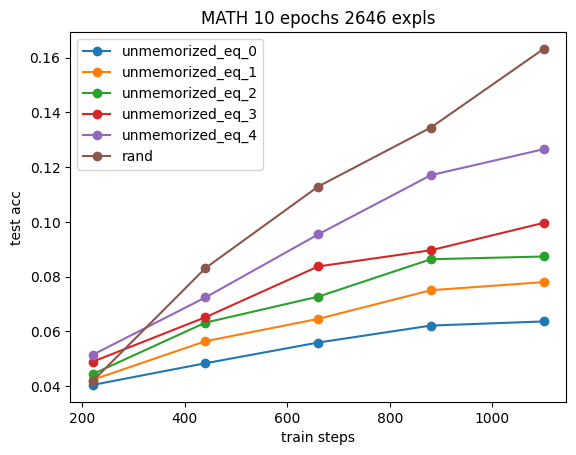

In [12]:
for num in range(5):
    plt.plot(ckpts10, test_accs_dict[num], "o-", label = f"unmemorized_eq_{num}")
    
plt.plot(ckpts10, test_accs_rand, "o-", label = "rand")
plt.legend()

plt.xlabel('train steps')
plt.ylabel("test acc")
plt.title("MATH 10 epochs 2646 expls")

In [13]:
with open('../data/MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('../data/MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [14]:
num_memorized_dict = {}
num_correct_different_dict = {}
num_incorrect_dict = {}
for num in range(5):
    num_memorized_all = []
    num_correct_different_all = []
    num_incorrect_all = []

    ckpts = ["220", "440", "660", "880", "1100"]

    for ckpt in ckpts:
        name = f"math_aug3_unmemorized_eq_{num}_total2646_epochs10"
        subsample_idxs = np.load("../ckpts/"+name+"/subsample_idxs.npy")
        # name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
        train_correct = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
        train_samples = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

        num_memorized_ckpt = []
        num_correct_different_ckpt = []
        num_incorrect_ckpt = []

        for input_idx in range(len(train_correct)):
            num_memorized = 0
            num_correct_different = 0
            num_incorrect = 0
            for sample_idx in range(5):
                correct = train_correct[input_idx, sample_idx]
                if correct:
                    if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                        num_memorized+=1
                    else:
                        num_correct_different+=1
                else:
                    num_incorrect+=1 
            num_memorized_ckpt.append(num_memorized)
            num_correct_different_ckpt.append(num_correct_different)
            num_incorrect_ckpt.append(num_incorrect)
        
        num_memorized_all.append(num_memorized_ckpt)
        num_correct_different_all.append(num_correct_different_ckpt)
        num_incorrect_all.append(num_incorrect_ckpt)
        
    num_memorized_all = np.array(num_memorized_all)
    num_correct_different_all = np.array(num_correct_different_all)
    num_incorrect_all = np.array(num_incorrect_all)

    num_memorized_dict[num] = num_memorized_all
    num_correct_different_dict[num] = num_correct_different_all
    num_incorrect_dict[num] = num_incorrect_all

In [62]:
num = 3
name = f"math_aug3_unmemorized_eq_{num}_total2646_epochs10"
subsample_idxs = np.load("../ckpts/"+name+"/subsample_idxs.npy")
print(len(subsample_idxs))
subsample_idxs

2646


array([ 88456,  80828,  53793, ..., 130635,  19048, 118861])

In [68]:
np.concatenate([np.load(f"../ckpts/math_aug3_total20000_epochs20/subsample_idxs_max_unmemorized=={i}.npy") for i in range(5)])

array([118387, 104881, 106898, ..., 119607, 105086,  40196])

In [57]:
len(set(subsample_idxs.tolist()))

2646

In [59]:
name = "math_aug3_rand2646_total2646_epochs10"
subsample_idxs = np.load("../ckpts/"+name+"/subsample_idxs.npy")
print(len(subsample_idxs))


2646


In [60]:
subsample_idxs

array([ 50039,  90123,  89628, ..., 122557,  13482,  80317])

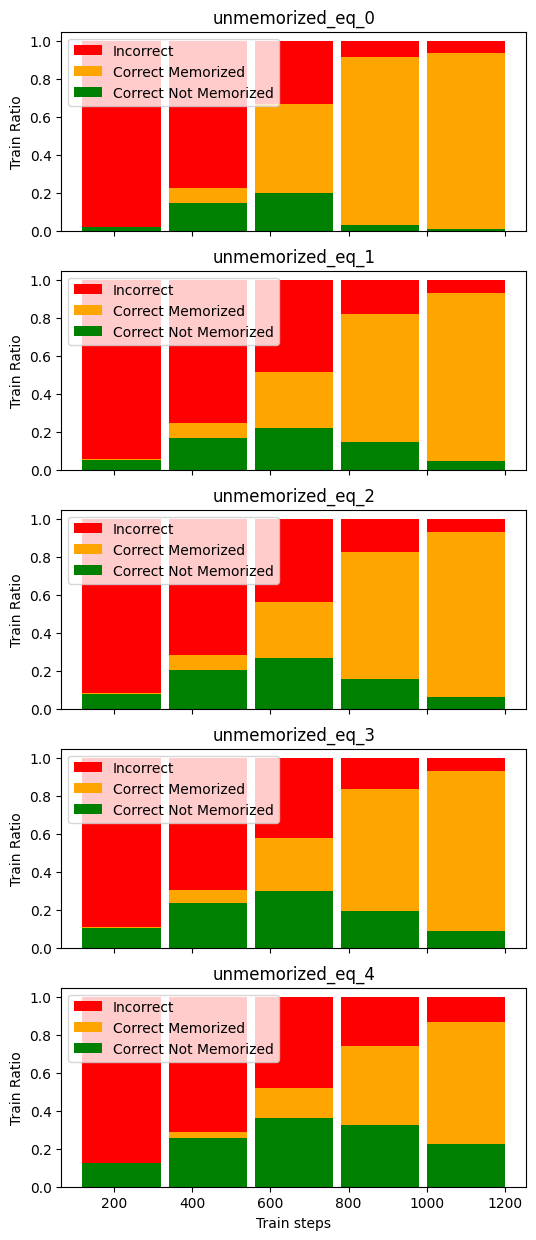

In [17]:
bar_width = 200

num_ckpts = len(ckpts10)
fig, ax = plt.subplots(5, 1, figsize=(6, 15), sharex=True, sharey=True)

for num in range(5):
    ax[num].bar(ckpts10, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
    ax[num].bar(ckpts10, [1-(num_incorrect_dict[num]/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
    ax[num].bar(ckpts10, [1-(num_incorrect_dict[num]/5).mean(axis=1)[i]-(num_memorized_dict[num]/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)
    # ax1.set_xticks([2*i for i in range(1, num_ckpts+1)])
    ax[num].set_ylabel("Train Ratio")
    ax[num].set_title(f"unmemorized_eq_{num}")
    ax[num].legend()

ax[4].set_xlabel("Train steps")
plt.savefig("delete.png")

In [19]:
num_memorized_rand = []
num_correct_different_rand = []
num_incorrect_rand = []

ckpts = ["220", "440", "660", "880", "1100"]

for ckpt in ckpts:
    name = "math_aug3_rand2646_total2646_epochs10"
    subsample_idxs = np.load("../ckpts/"+name+"/subsample_idxs.npy")

    train_correct = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_rand.append(num_memorized_ckpt)
    num_correct_different_rand.append(num_correct_different_ckpt)
    num_incorrect_rand.append(num_incorrect_ckpt)
    
num_memorized_rand = np.array(num_memorized_rand)
num_correct_different_rand = np.array(num_correct_different_rand)
num_incorrect_rand = np.array(num_incorrect_rand)

In [43]:
name = "math_aug3_rand2646_total2646_epochs10"
subsample_idxs_rand = np.load("../ckpts/"+name+"/subsample_idxs.npy")

num = 0
idxs_unmemorized_eq_num = np.load(f"../ckpts/math_aug3_total20000_epochs20/subsample_idxs_max_unmemorized=={num}.npy")

In [44]:
subsample_idxs_rand_subsample = []
for i in range(len(subsample_idxs_rand)):
    if subsample_idxs_rand[i] in idxs_unmemorized_eq_num:
        subsample_idxs_rand_subsample.append(i)
        

Text(0.5, 0, 'train steps')

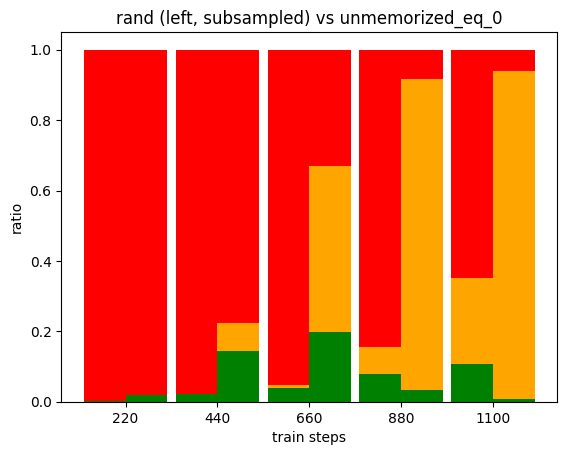

In [45]:
bar_width = 100
num_ckpts = len(ckpts10)
plt.bar(ckpts10, np.array([1 for i in range(num_ckpts)]), color = "red", label = "Incorrect", width=bar_width)
plt.bar(ckpts10, np.array([1-(num_incorrect_rand[:,subsample_idxs_rand_subsample]/5).mean(axis=1)[i] for i in range(num_ckpts)]), color = "orange", label = "Correct Memorized", width=bar_width)
plt.bar(ckpts10, np.array([1-(num_incorrect_rand[:,subsample_idxs_rand_subsample]/5).mean(axis=1)[i]-(num_memorized_rand[:, subsample_idxs_rand_subsample]/5).mean(axis=1)[i] for i in range(num_ckpts)]), color = "green", label = "Correct Not Memorized", width=bar_width)

# ax3.set_ylabel("Train Ratio")
# ax3.set_title("MATH (2646 train expls) rand")

num_ckpts = len(ckpts10)
plt.bar(np.array(ckpts10)+100, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
plt.bar(np.array(ckpts10)+100, [1-(num_incorrect_dict[num]/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
plt.bar(np.array(ckpts10)+100, [1-(num_incorrect_dict[num]/5).mean(axis=1)[i]-(num_memorized_dict[num]/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)

plt.xticks(np.array(ckpts10)+50, ckpts10)
plt.title(f"rand (left, subsampled) vs unmemorized_eq_{num}")
plt.ylabel("ratio")
plt.xlabel("train steps")
